In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [81]:
data=pd.read_csv("C:\\Users\\user\\Downloads\\delivery_time (1).csv")

In [82]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


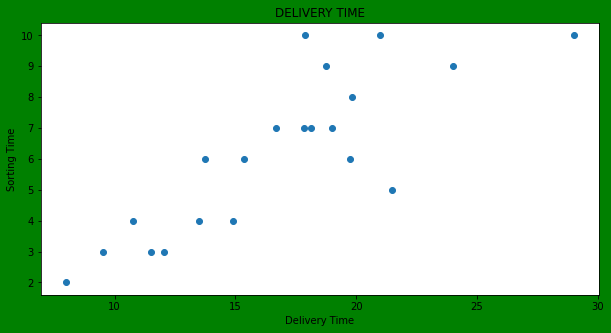

In [83]:
plt.figure(figsize=(10,5),facecolor="green")
plt.scatter(data["Delivery Time"],data["Sorting Time"])
plt.title("DELIVERY TIME")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

In [44]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [45]:
data["Delivery Time"].values.reshape(-1,1)

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [46]:
data["Sorting Time"].values.reshape(-1,1)

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [47]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
lm=LinearRegression()
x=data["delivery_time"].values.reshape(-1,1)
y=data["sorting_time"].values.reshape(-1,1)

In [49]:
lm.fit(x,y)

LinearRegression()

In [50]:
data.delivery_time.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: delivery_time, dtype: float64

In [51]:
print(lm.coef_)
print(lm.intercept_)

[[0.41374363]]
[-0.75667337]


In [52]:
lm.predict(x)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

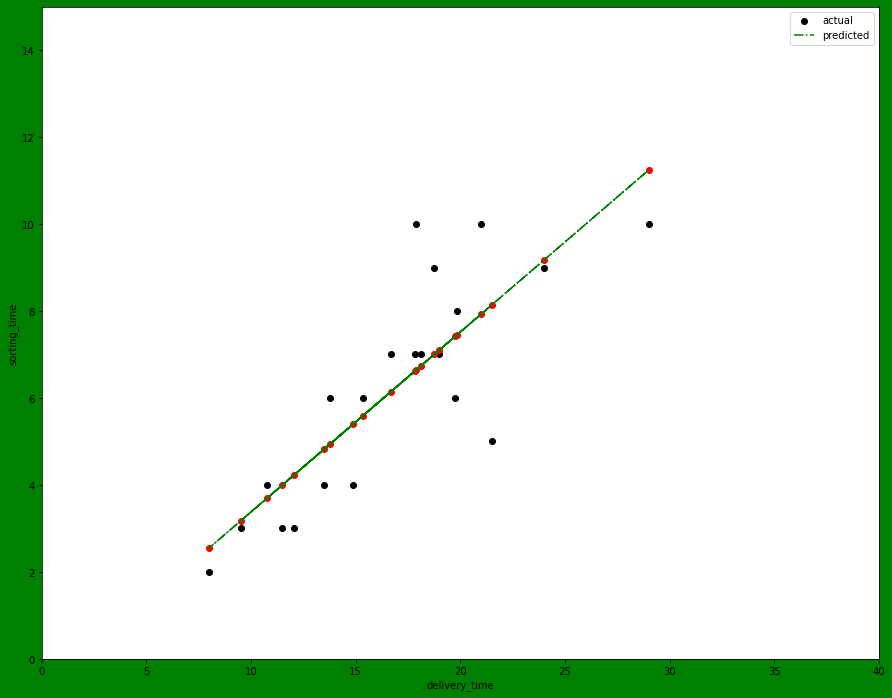

In [53]:
plt.figure(figsize=(15,12),facecolor="green")
plt.scatter(data.delivery_time, data.sorting_time, color="black", label="actual")
plt.plot(data.delivery_time, lm.predict(x), label="predicted", color="green", linestyle="-.")
plt.scatter(data.delivery_time, lm.predict(x), color="red")
plt.xlabel("delivery_time")
plt.ylabel("sorting_time")
plt.xlim(0,40)
plt.ylim(0,15)
plt.legend(loc="best")
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

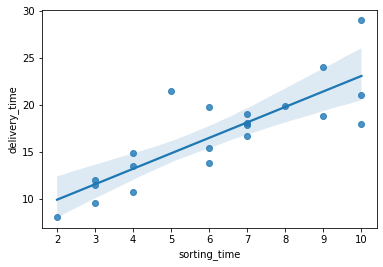

In [54]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [59]:
pred_train_lm=lm.predict(x)
r2_score(data["sorting_time"],pred_train_lm)

0.682271474841723

# statsmodels method

In [60]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [61]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [62]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:21:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [65]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [66]:
model.rsquared

0.6822714748417231

In [67]:
model2=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

In [68]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        12:21:41   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model2.rsquared

0.6954434611324223

In [70]:
model3=smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()

In [73]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 27 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           12:22:50   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model3.rsquared

0.7109478980584187

In [75]:
data["delivery_time_sq"]=data.delivery_time**2

In [76]:
model4=smf.ols("np.log(sorting_time)~delivery_time+ delivery_time_sq",data=data).fit()

In [77]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Tue, 27 Dec 2022   Prob (F-statistic):           6.77e-07
Time:                          12:23:04   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
delivery_time        0.2272      0.052      4.346      0.000       0.117       0.337
delivery_time_sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model4.rsquared

0.7936928834488207

In [90]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [91]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [92]:
#manual prediction if we take sorting time is 5
delivery_time= 2.121372 +(0.105552)*5

In [93]:
delivery_time

2.649132

In [94]:
#automatic prediction for sorting time 5, 8
data1=pd.Series([5,8,11])

In [95]:
data1

0     5
1     8
2    11
dtype: int64

In [96]:
predicted_data=pd.DataFrame(data1,columns=['sorting_time'])

In [97]:
model.predict(predicted_data)

0    14.827833
1    19.774893
2    24.721953
dtype: float64